# Основы статистики

**В данном ноутбуке я демонстрирую базовые методы описательной статистики, корреляционного анализа и анализа распределений на примере табличных и финансовых данных.**

In [84]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

## Разберем основные понятия статистики ##

### Возьму набор данных с метриками эффективности - о рентабельности капитала корпоративных банков (ROE - return on equity), их стоимости фондирования (COF) и кредитном рейтинге (rating) ###

In [114]:
df_banks = pd.DataFrame({'ROE': [7.4, 7.8, 5.9, 7.1, 6.8, 7.6, 7.9, 8.3, 7.2, 6.9, 7.9],
 'COF': [6.3, 4.2, 6.2, 8.1, 8.4, 7.5, 6.5, 7.8, 6.9, 7.1, 7.2],
 'rating': ['AAA', 'BB+', 'BB+', 'AAA', 'BBB-', 'AA', 'AAA', 'AAA', 'BBB-', 'AAA', 'BB+']})

print(df_banks.head(3))

   ROE  COF rating
0  7.4  6.3    AAA
1  7.8  4.2    BB+
2  5.9  6.2    BB+


****
**Расчитаем описательные статистики и нарисуем 3 популярных графика для анализа ROE**

In [148]:
roe_med = df_banks['ROE'].median() # Расчитаем медиану ROE (второй квартиль, он же 50-й перцентиль или 0.5 квантиль распределения)
roe_mean = df_banks['ROE'].mean() # Среднее значение ROE
roe_mode = df_banks['ROE'].mode() # Рассчитаем значение моды ROE
roe_std = round(df_banks['ROE'].std(),2) # Стандартное отклонение ROE
roe_var_s = round(df_banks['ROE'].var(ddof=0),2) # Смещенная оценка дисперсии ROE
roe_var = round(df_banks['ROE'].var(),2) # Несмещенная оценка дисперсии ROE
roe_25_q = df_banks['ROE'].quantile(0.25) # 0.25 квантиль ROE, первый или нижний квартиль, он же 25-й перцентиль
roe_75_q = df_banks['ROE'].quantile(0.75) # 0.75 квантиль ROE, третий или верхний квартиль, он же 75-й перцентиль

0.25 квантиль "ROE": 7.0
Медиана "ROE": 7.4
0.75 квантиль "ROE": 7.85
Среднее значение "ROE": 7.35
Мода в "ROE": 7.9
Стандартное отклонение "ROE": 0.67
Смещенная оценка дисперсии "ROE": 0.41
Несмещенная оценка дисперсии "ROE": 0.45


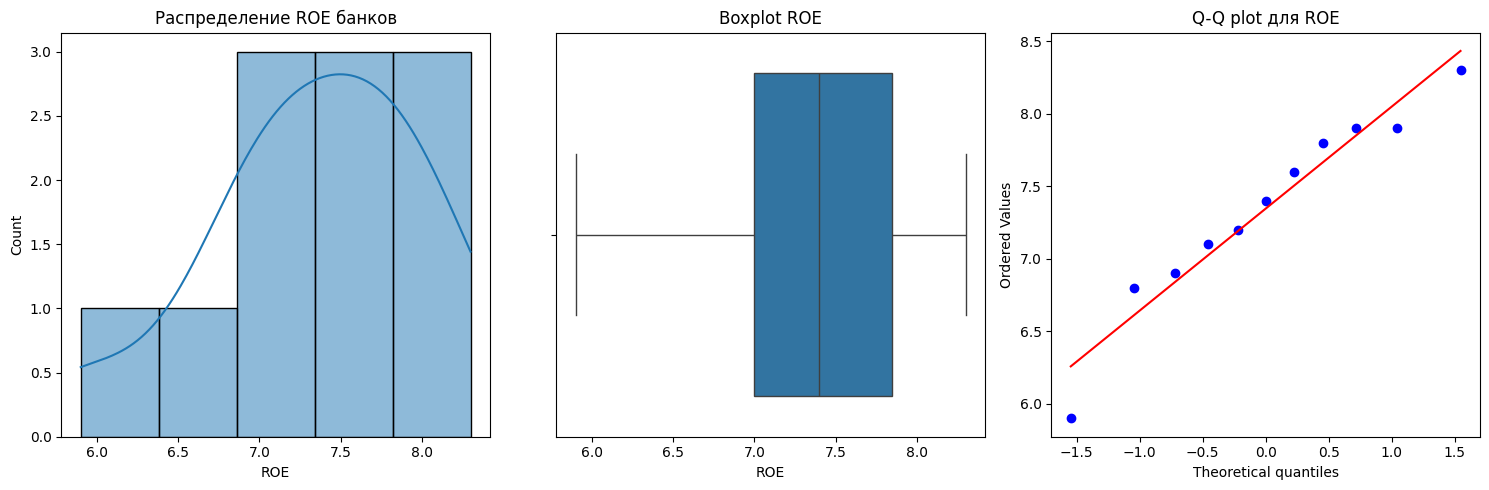

In [150]:
print(f'0.25 квантиль "ROE": {roe_25_q}\n'
      f'Медиана "ROE": {roe_med}\n'
      f'0.75 квантиль "ROE": {roe_75_q}')
print(f'Среднее значение "ROE": {round(roe_mean, 2)}\n'
      f'Мода в "ROE": {roe_mode.iloc[0]}')

print(f'Стандартное отклонение "ROE": {roe_std}\n'
      f'Смещенная оценка дисперсии "ROE": {roe_var_s}\n'
      f'Несмещенная оценка дисперсии "ROE": {roe_var}')

# Сделаем красивую сетку что бы расположить графики по горизонтали
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df_banks['ROE'], kde=True, ax=axes[0])
axes[0].set_title('Распределение ROE банков')

sns.boxplot(x=df_banks['ROE'], ax=axes[1])
axes[1].set_title('Boxplot ROE')

stats.probplot(df_banks['ROE'], plot=axes[2])
axes[2].set_title('Q-Q plot для ROE')
plt.tight_layout()
plt.show()


Визуальный анализ графиков позволяет нам понять тип распределения, увидеть наличие выбросов, максимальные и минимальные значения, по Boxplot удобно считывать 1, 3 квартили и медиану, визуальный анализ QQ-plot покажет нормальность распределения

****
**Рассчитаем коэфициент корреляции Пирсона между ROE и COF и нарисуем график**

Коэффициент корреляции Пирсона: -0.0641
p-value: 0.8515


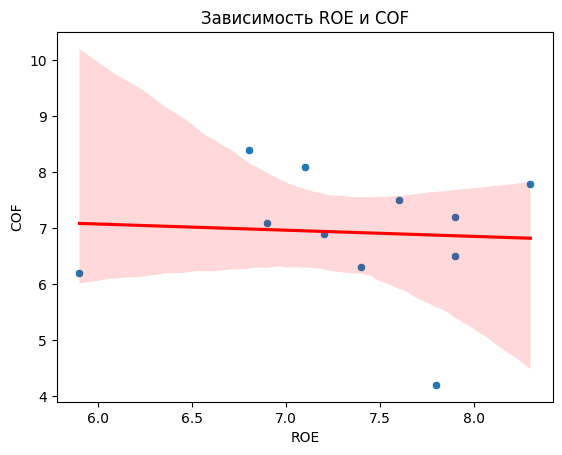

In [123]:
df_cor_pirs = stats.pearsonr(df_banks['ROE'], df_banks['COF'])

print(f'Коэффициент корреляции Пирсона: {round(df_cor_pirs.statistic, 4)}')
print(f'p-value: {round(df_cor_pirs.pvalue, 4)}')

sns.scatterplot(x='ROE', y='COF', data=df_banks)
sns.regplot(x='ROE', y='COF', data=df_banks, scatter=False, color='red')
plt.title('Зависимость ROE и COF')
plt.show()

Вывод: рассмотренные методы позволяют оценить распределение, выявить выбросы и проверить наличие линейной зависимости. На данной выборке статистически значимой связи между ROE и COF не обнаружено \
_* Коэффициент корреляции Пирсона измеряет линейную зависимость между двумя
непрерывными переменными. Значение близкое к 1 или -1 указывает на сильную
линейную связь._